#📌**Step 1: Import Libraries**

In [ ]:
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
import re
from nltk.corpus import stopwords
from collections import Counter
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from scipy.sparse import hstack
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

#**📌 Step 2: Load Dataset & EDA (Exploratory Data Analysis)**

In [ ]:
!git clone https://github.com/ironhack-labs/project-nlp-challenge

Cloning into 'project-nlp-challenge'...
remote: Enumerating objects: 6, done.
remote: Total 6 (delta 0), reused 0 (delta 0), pack-reused 6 (from 1)
Receiving objects: 100% (6/6), 40.45 MiB | 27.95 MiB/s, done.


In [ ]:
df = pd.read_csv("/content/project-nlp-challenge/dataset/data.csv")

In [ ]:
df.head(20)

,label,title,text,subject,date
0,1,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,1,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,1,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,1,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
5,1,"White House, Congress prepare for talks on spe...","WEST PALM BEACH, Fla./WASHINGTON (Reuters) - T...",politicsNews,"December 29, 2017"
6,1,"Trump says Russia probe will be fair, but time...","WEST PALM BEACH, Fla (Reuters) - President Don...",politicsNews,"December 29, 2017"
7,1,Factbox: Trump on Twitter (Dec 29) - Approval ...,The following statements were posted to the ve...,politicsNews,"December 29, 2017"
8,1,Trump on Twitter (Dec 28) - Global Warming,The following statements were posted to the ve...,politicsNews,"December 29, 2017"
9,1,Alabama official to certify Senator-elect Jone...,WASHINGTON (Reuters) - Alabama Secretary of St...,politicsNews,"December 28, 2017"


In [ ]:
df.tail(20)

,label,title,text,subject,date
39922,0,H.S. Football Team Stages “Die-In” To Show Sup...,"Some 2,500 Americans Have Died in Afghanistan ...",left-news,"Sep 25, 2016"
39923,0,3 WORKERS At Major Chain Store REFUSE To Make ...,We are witnessing the slow death of political ...,left-news,"Sep 25, 2016"
39924,0,AFRICAN-AMERICAN MUSEUM GRAND OPENING IRONY: W...,This is just stunning! Free speech in our nati...,left-news,"Sep 25, 2016"
39925,0,GRAB THE POPCORN! Queen Of Corruption DENIED S...,The Drudge Report has gained access to the rul...,left-news,"Sep 24, 2016"
39926,0,BUSTED! LIBERAL BRAINIACS Steal Trump Sign…In ...,This is just idiotic! A couple of liberal brai...,left-news,"Sep 24, 2016"
39927,0,DOUBLE STANDARD? WHITE MLB Player Suspended Fo...,This double standard surprises no one who s pa...,left-news,"Sep 23, 2016"
39928,0,KEITH SCOTT’S BROTHER Tells Charlotte Reporter...,The first Black (and half White) President has...,left-news,"Sep 23, 2016"
39929,0,NY TIMES RELEASES Dramatic Video of Keith Scot...,The New York Times released a dramatic video t...,left-news,"Sep 23, 2016"
39930,0,BREAKING CHARLOTTE: VIDEO Shows Young White Gi...,The unwarranted violence against innocent Whit...,left-news,"Sep 23, 2016"
39931,0,DEAD BROKE HILLARY Buys Million Dollar “Mother...,The 2014 IRS filings for the Clinton Foundatio...,left-news,"Sep 23, 2016"


In [ ]:
# Check column names and data types
print("\nColumn info:")
print(df.info())


Column info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39942 entries, 0 to 39941
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    39942 non-null  int64 
 1   title    39942 non-null  object
 2   text     39942 non-null  object
 3   subject  39942 non-null  object
 4   date     39942 non-null  object
dtypes: int64(1), object(4)
memory usage: 1.5+ MB
None


Label Counts:
label
1    19999
0    19943
Name: count, dtype: int64


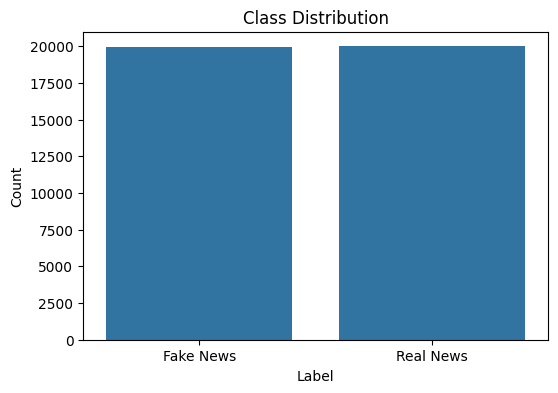

In [ ]:
 # 2. EDA: Check Class Balance
label_counts = df['label'].value_counts()
print("Label Counts:")
print(label_counts)

plt.figure(figsize=(6, 4))
sns.barplot(x=label_counts.index, y=label_counts.values)
plt.xlabel("Label")
plt.ylabel("Count")
plt.title("Class Distribution")
plt.xticks(ticks=[0, 1], labels=["Fake News", "Real News"])
plt.show()

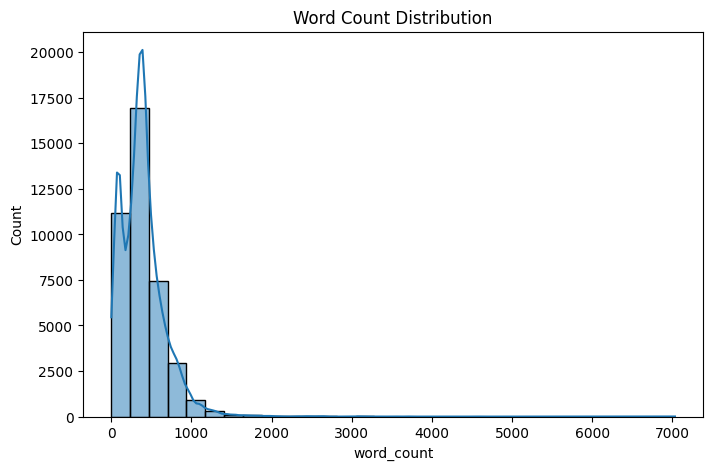

In [ ]:
# 3. EDA: Word Count Distribution
df['word_count'] = df['text'].apply(lambda x: len(str(x).split()))
plt.figure(figsize=(8, 5))
sns.histplot(df['word_count'], bins=30, kde=True)
plt.title("Word Count Distribution")
plt.show()

In [ ]:
df.isnull().sum()

,0
label,0
title,0
text,0
subject,0
date,0
word_count,0


In [ ]:
# Check for duplicate rows
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

Number of duplicate rows: 201


In [ ]:
df = df.drop_duplicates()

In [ ]:
# Check subject-label correlation
subject_label_crosstab = pd.crosstab(df['subject'], df['label'])
print("Subject vs. Label Crosstab:")
print(subject_label_crosstab)

# Check date-label correlation (group by year)
year_label_crosstab = pd.crosstab(df['date'], df['label'])
print("\nYear vs. Label Crosstab:")
print(year_label_crosstab)

# Check for obvious text patterns (e.g., "fake" in fake articles)
fake_articles = df[df['label'] == 0]['text'].str.lower()
real_articles = df[df['label'] == 1]['text'].str.lower()
print("\nSample fake article (first 100 chars):", fake_articles.iloc[0][:100])
print("Sample real article (first 100 chars):", real_articles.iloc[0][:100])

Subject vs. Label Crosstab:
label               0      1
subject                     
Government News  1570      0
News             9050      0
left-news        2482      0
politics         6838      0
politicsNews        0  11220
worldnews           0   8581

Year vs. Label Crosstab:
label                                               0  1
date                                                    
14-Feb-18                                           1  0
15-Feb-18                                           9  0
16-Feb-18                                           8  0
17-Feb-18                                           7  0
18-Feb-18                                           7  0
...                                                .. ..
https://100percentfedup.com/12-yr-old-black-con...  1  0
https://100percentfedup.com/served-roy-moore-vi...  1  0
https://100percentfedup.com/video-hillary-asked...  1  0
https://fedup.wpengine.com/wp-content/uploads/2...  2  0
https://fedup.wpengine.com/wp-

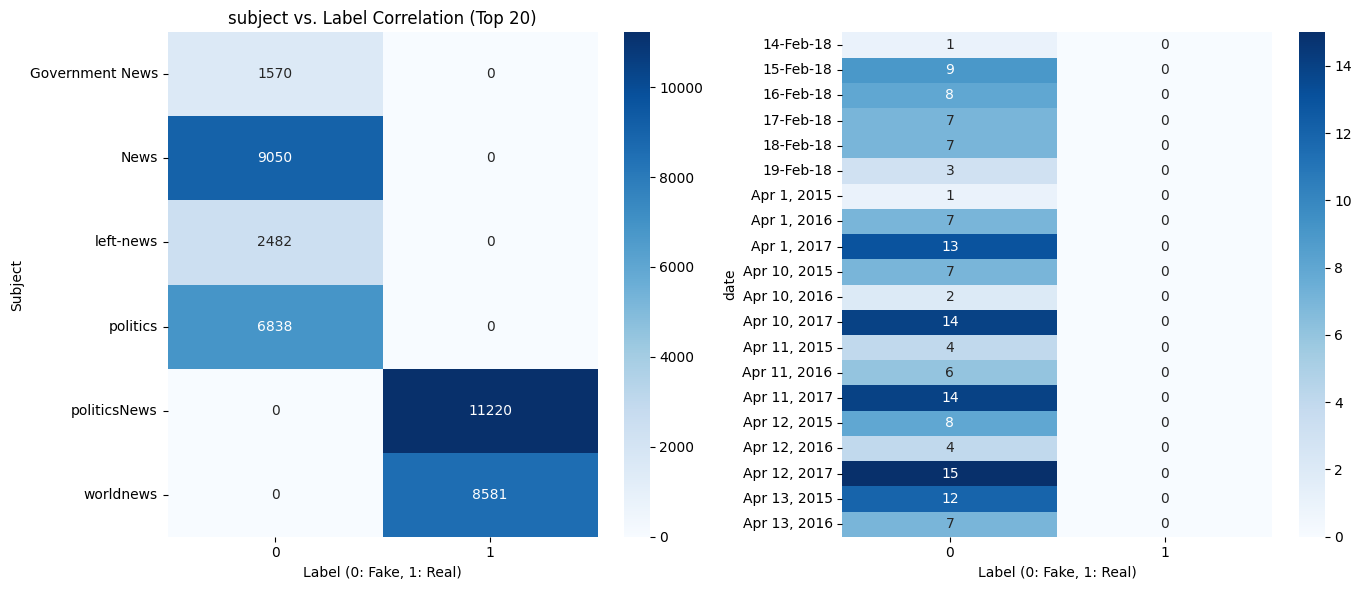


Sample fake article (first 100 chars): donald trump just couldn t wish all americans a happy new year and leave it at that. instead, he had
Sample real article (first 100 chars): washington (reuters) - the head of a conservative republican faction in the u.s. congress, who voted


In [ ]:
# Check subject-label correlation (crosstab)
subject_label_crosstab = pd.crosstab(df['subject'], df['label'])

# Check year-label correlation (group by year)
date_label_crosstab = pd.crosstab(df['date'], df['label'])

# Plot heatmaps
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Heatmap for subject vs. label
sns.heatmap(subject_label_crosstab, annot=True, fmt='d', cmap='Blues', ax=ax1)
ax1.set_title('Subject vs. Label Correlation')
ax1.set_xlabel('Label (0: Fake, 1: Real)')
ax1.set_ylabel('Subject')

# Heatmap for year vs. label (limiting to top 20 years for clarity)
date_label_crosstab_top = date_label_crosstab.head(20)  # Adjust if needed
sns.heatmap(date_label_crosstab_top, annot=True, fmt='d', cmap='Blues', ax=ax2)
ax1.set_title('subject vs. Label Correlation (Top 20)')
ax2.set_xlabel('Label (0: Fake, 1: Real)')
ax2.set_ylabel('date')

plt.tight_layout()
plt.show()

# Check for obvious text patterns (same as before)
fake_articles = df[df['label'] == 0]['text'].str.lower()
real_articles = df[df['label'] == 1]['text'].str.lower()
print("\nSample fake article (first 100 chars):", fake_articles.iloc[0][:100])
print("Sample real article (first 100 chars):", real_articles.iloc[0][:100])

#**📌 Step 3: Data Preprocessing**

**Word Frequency Analysis and Rare Word Identification**

In [ ]:
# Combine all text for frequency calculation
all_words = ' '.join(df['text'].astype(str)).split()
word_freq = Counter(all_words)

# Identify rare words (frequency < 5)
min_freq = 5
rare_words = set(word for word, freq in word_freq.items() if freq < min_freq)
print(f"Number of rare words (frequency < {min_freq}): {len(rare_words)}")

# Print the top 20 most common words for context
print("\nTop 20 Most Common Words (before preprocessing):")
for word, freq in word_freq.most_common(20):
    print(f"{word}: {freq}")

# Print a sample of rare words
print("\nSample of Rare Words (first 10):")
print(list(rare_words)[:10])

Number of rare words (frequency < 5): 290007

Top 20 Most Common Words (before preprocessing):
the: 763526
to: 456993
of: 367035
a: 336421
and: 330292
in: 273283
that: 191309
on: 158876
for: 144077
s: 142721
is: 136617
with: 97549
was: 97313
he: 96252
Trump: 95361
said: 83984
his: 82436
The: 81280
as: 80991
by: 78093

Sample of Rare Words (first 10):
['instagram.com/p/BcaeCLLAEkl/', 'dullards', 'desensitization', 'beseeching', 'saviour', '‘10,', 'Tamils,', 'representative;', 'ago.Domain', 'pic.twitter.com/xpL69a5R8M']


**Steps of the Preprocessing Text and Title:**


1.   **Convert to String and Lowercase**
*   The input text is first converted to a string using str(text) to ensure compatibility, even if the input is not already a string (e.g., handling numbers or NaN values).
*   The text is then converted to lowercase using .lower() to standardize it and reduce case sensitivity (e.g., "The" and "the" are treated as the same word).


2.   **Tokenization:**


*   The text is split into individual words (tokens) using word_tokenize()

3. **Remove Stop Words and Punctuation:**


*   Remove common English stop words (e.g., "the", "a", "is")
*   Remove Punctuation marks (e.g., ".", ",", "!")

4. **Lemmatization:**
We use lemmatization because it is designed to preserve the meaning of a word by reducing it to its base or dictionary form, which is ideal for our case of classifying news.

5. Remove Rare Words:
*   Remove the terms that might not be useful for analysis.

6. Join Tokens Back into a String:
*   joined tokens back together into a single string with spaces between them using ' '.join(tokens).**

In [ ]:
# Text preprocessing tools
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
punctuation = set(string.punctuation)

# Define preprocessing function with rare word removal
def preprocess_text(text):
    tokens = word_tokenize(str(text).lower())  # Convert to string to handle NaN
    tokens = [token for token in tokens if token not in stop_words and token not in punctuation]
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    tokens = [token for token in tokens if token not in rare_words]  # Remove rare words
    return ' '.join(tokens) if tokens else ''  # Return empty string if no tokens remain

# Apply to title and text
df['title_processed'] = df['title'].apply(preprocess_text)
df['text_processed'] = df['text'].apply(preprocess_text)

# Check processed output for first row
print("Processed Title:", df['title_processed'][0])
print("Processed Text (first 100 chars):", df['text_processed'][0][:100])

Processed Title: u.s. budget fight loom republican flip fiscal script
Processed Text (first 100 chars): washington head conservative republican faction u.s. congress voted month huge expansion national de


In [ ]:
df['title_processed'].head(10)

,title_processed
0,u.s. budget fight loom republican flip fiscal ...
1,u.s. military accept transgender recruit pentagon
2,senior u.s. republican senator 'let mueller job
3,probe helped australian diplomat tip-off nyt
4,trump want postal service charge 'much amazon ...
5,white house congress prepare talk spending imm...
6,trump say probe fair timeline unclear nyt
7,trump twitter dec 29 approval rating amazon
8,trump twitter dec 28 global warming
9,alabama official certify senator-elect jones t...


In [ ]:
df['text_processed'].head(10)

,text_processed
0,washington head conservative republican factio...
1,washington transgender people allowed first ti...
2,washington special counsel investigation link ...
3,washington trump campaign adviser papadopoulos...
4,seattle/washington president donald trump call...
5,west palm beach fla./washington white house sa...
6,west palm beach fla president donald trump sai...
7,following statement posted verified twitter ac...
8,following statement posted verified twitter ac...
9,washington alabama secretary state john merril...


In [ ]:
# Function to check for URLs
def has_url(text):
    url_pattern = r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+|www\.[a-zA-Z0-9.-]+'
    return bool(re.search(url_pattern, text))

# Check for URLs in title_processed
df['has_url_title'] = df['title_processed'].apply(has_url)
url_titles = df[df['has_url_title']]
print("Articles with URLs in title_processed:")
print(url_titles[['title_processed', 'label']])
print(f"Total with URLs in title: {len(url_titles)}")
print(f"Breakdown by label: {url_titles['label'].value_counts()}")

# Check for URLs in text_processed
df['has_url_text'] = df['text_processed'].apply(has_url)
url_texts = df[df['has_url_text']]
print("\nArticles with URLs in text_processed:")
print(url_texts[['text_processed', 'label']])
print(f"Total with URLs in text: {len(url_texts)}")
print(f"Breakdown by label: {url_texts['label'].value_counts()}")

# Overall summary
total_with_urls = len(df[df['has_url_title'] | df['has_url_text']])
print(f"\nTotal articles with URLs in title or text: {total_with_urls}")
print(f"Percentage of dataset with URLs: {(total_with_urls / len(df)) * 100:.2f}%")

Articles with URLs in title_processed:
Empty DataFrame
Columns: [title_processed, label]
Index: []
Total with URLs in title: 0
Breakdown by label: Series([], Name: count, dtype: int64)

Articles with URLs in text_processed:
                                          text_processed  label
680    angeles convincing big u.s. dairy owner buy ro...      1
852    new york many immigration initiative launched ...      1
884    washington president donald trump announced oc...      1
1379   washington hundred government employee file u....      1
1422   nogales arizona two thousand mile away healthc...      1
...                                                  ...    ...
39403  video featured youtube prankster named adam sa...      0
39421  michelle obama told oprah winfrey final interv...      0
39494         http //www.youtube.com/watch v=_fnt3ns_ega      0
39833  wow hillary stop sending people website debate...      0
39937  left organizing decade soros funding chaos occ...      0

[605 ro

#**Observation**


*   Title_processed: No URLs found (empty DataFrame), which is the titles are clean in this regard.
*   Text_processed:

    *   621 articles contain URLs (out of ~39,952 total, or 1.55% of the dataset).
    *   Breakdown by label:
        
          *   583 fake (label 0).
          *   38 real (label 1).
    *   This indicates a strong correlation between URLs and the fake label (583/621 = 93.88% of URL-containing articles are fake).







#**Next Step : Remove URLs from Processed Text**

In [ ]:
# Function to remove URLs
def clean_urls(text):
    url_pattern = r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+|www\.[a-zA-Z0-9.-]+'
    return re.sub(url_pattern, '', text, flags=re.MULTILINE).strip()

# Apply cleaning to title and text
df['text_processed'] = df['text_processed'].apply(clean_urls)

#**📌 Step 4: Split Data into Training and Test Sets**

**Split the dataset into training (80%) and test (20%) sets before feature extraction to prevent data leakage.**




In [ ]:
# Define features (raw processed text) and labels
X_title = df['title_processed']
X_text = df['text_processed']
y = df['label']

# Split the data
X_title_train, X_title_test, X_text_train, X_text_test, y_train, y_test = train_test_split(
    X_title, X_text, y, test_size=0.2, random_state=42
)

print("Training set size:", len(X_title_train))
print("Test set size:", len(X_title_test))

Training set size: 31792
Test set size: 7949


#**📌 Step 5: Apply TF-IDF Feature Extraction**
**Fit the TF-IDF vectorizer on the training data only, then transform both training and test sets to create feature matrices for `title` and `text`.**

In [ ]:
# Initialize TF-IDF vectorizers
tfidf_title = TfidfVectorizer(max_features=5000, min_df=5, ngram_range=(1, 2))
tfidf_text = TfidfVectorizer(max_features=10000, min_df=5, ngram_range=(1, 2))

# Fit and transform on training data
title_tfidf_train = tfidf_title.fit_transform(X_title_train)
text_tfidf_train = tfidf_text.fit_transform(X_text_train)

# Transform test data (do NOT fit on test data)
title_tfidf_test = tfidf_title.transform(X_title_test)
text_tfidf_test = tfidf_text.transform(X_text_test)

# Combine features for training and test sets
X_train = hstack([title_tfidf_train, text_tfidf_train])
X_test = hstack([title_tfidf_test, text_tfidf_test])

print("Training feature matrix shape:", X_train.shape)
print("Test feature matrix shape:", X_test.shape)

Training feature matrix shape: (31792, 15000)
Test feature matrix shape: (7949, 15000)


#**📌 Step 6: Train and Evaluate Logistic Regression Model**
**Train a Logistic Regression model on the TF-IDF features and evaluate its performance on the test set using accuracy and classification report.**

In [ ]:
# Train Logistic Regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict and evaluate on test data
y_pred = model.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Test Classification Report:\n", classification_report(y_test, y_pred))

Test Accuracy: 0.9903132469493018
Test Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      3970
           1       0.99      0.99      0.99      3979

    accuracy                           0.99      7949
   macro avg       0.99      0.99      0.99      7949
weighted avg       0.99      0.99      0.99      7949



In [ ]:
# Predict and evaluate on training data (for overfitting check)
y_train_pred = model.predict(X_train)
print("\nTraining Accuracy:", accuracy_score(y_train, y_train_pred))


Training Accuracy: 0.9969803724207348



Training Confusion Matrix:
[[15912    58]
 [   38 15784]]

Test Confusion Matrix:
[[3925   45]
 [  32 3947]]


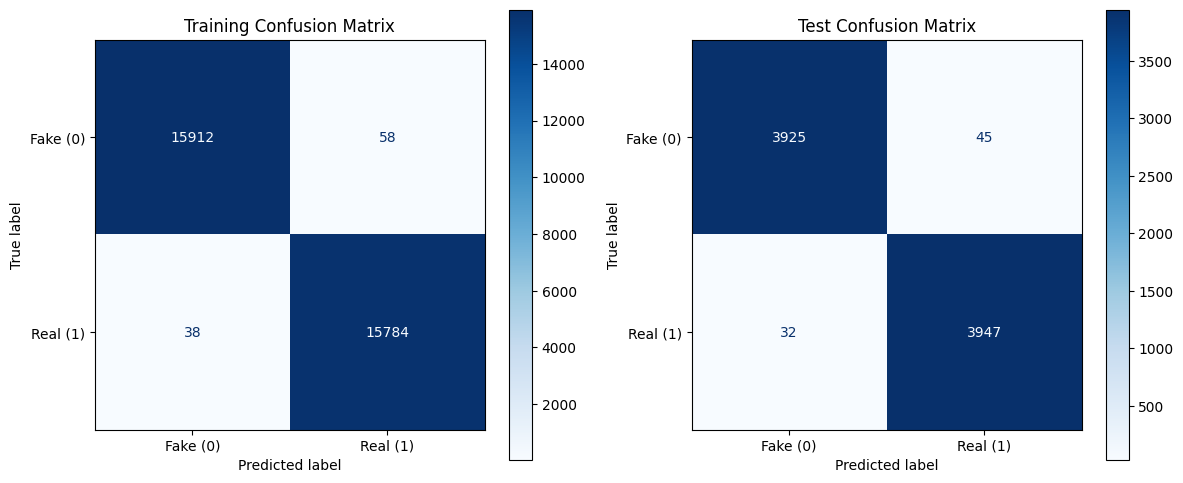

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# Confusion matrix for training data
train_cm = confusion_matrix(y_train, y_train_pred, labels=[0, 1])
print("\nTraining Confusion Matrix:")
print(train_cm)

# Confusion matrix for test data
test_cm = confusion_matrix(y_test, y_pred, labels=[0, 1])
print("\nTest Confusion Matrix:")
print(test_cm)

# Visualize confusion matrices
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Training confusion matrix plot
ConfusionMatrixDisplay(confusion_matrix=train_cm, display_labels=['Fake (0)', 'Real (1)']).plot(ax=ax1, cmap='Blues')
ax1.set_title("Training Confusion Matrix")

# Test confusion matrix plot
ConfusionMatrixDisplay(confusion_matrix=test_cm, display_labels=['Fake (0)', 'Real (1)']).plot(ax=ax2, cmap='Blues')
ax2.set_title("Test Confusion Matrix")

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.svm import SVC

# Train SVM model
svm_model = SVC(kernel='rbf', random_state=42)  # You can adjust kernel (e.g., 'linear', 'rbf', 'poly')
svm_model.fit(X_train, y_train)

# Predict and evaluate on test data
y_pred_svm = svm_model.predict(X_test)
print("Test Accuracy (SVM):", accuracy_score(y_test, y_pred_svm))
print("Test Classification Report (SVM):\n", classification_report(y_test, y_pred_svm))

Test Accuracy (SVM): 0.9927034847150585
Test Classification Report (SVM):
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      3970
           1       0.99      0.99      0.99      3979

    accuracy                           0.99      7949
   macro avg       0.99      0.99      0.99      7949
weighted avg       0.99      0.99      0.99      7949



In [ ]:
# Predict and evaluate on training data (for overfitting check)
y_train_pred_svm = svm_model.predict(X_train)
print("\nTraining Accuracy (SVM):", accuracy_score(y_train, y_train_pred_svm))


Training Accuracy (SVM): 0.9997483643683945



Training Confusion Matrix (SVM):
[[15969     1]
 [    7 15815]]

Test Confusion Matrix (SVM):
[[3938   32]
 [  26 3953]]


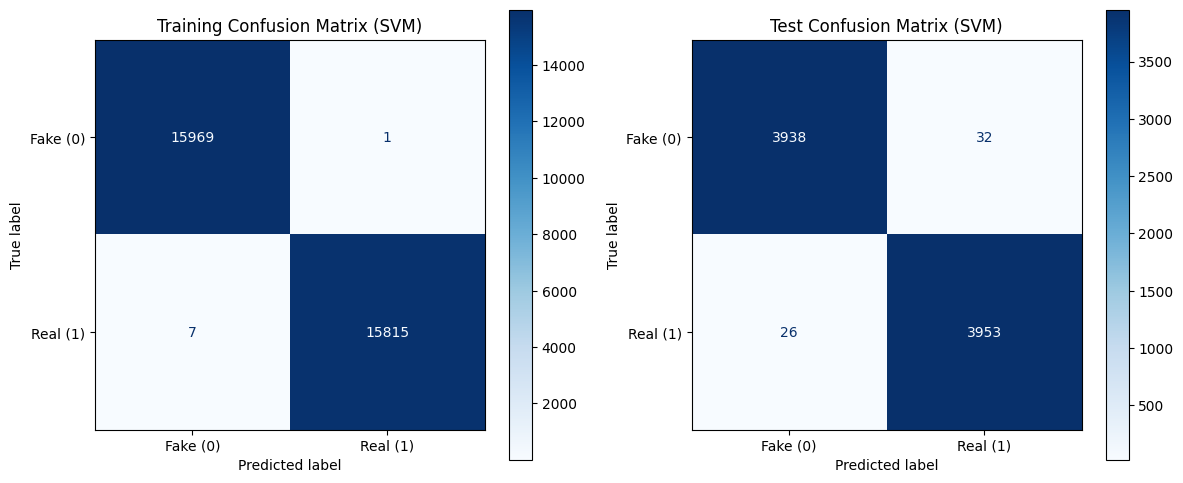

In [ ]:
# Confusion matrix for training data
train_cm_svm = confusion_matrix(y_train, y_train_pred_svm, labels=[0, 1])
print("\nTraining Confusion Matrix (SVM):")
print(train_cm_svm)

# Confusion matrix for test data
test_cm_svm = confusion_matrix(y_test, y_pred_svm, labels=[0, 1])
print("\nTest Confusion Matrix (SVM):")
print(test_cm_svm)

# Visualize confusion matrices
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Training confusion matrix plot
ConfusionMatrixDisplay(confusion_matrix=train_cm_svm, display_labels=['Fake (0)', 'Real (1)']).plot(ax=ax1, cmap='Blues')
ax1.set_title("Training Confusion Matrix (SVM)")

# Test confusion matrix plot
ConfusionMatrixDisplay(confusion_matrix=test_cm_svm, display_labels=['Fake (0)', 'Real (1)']).plot(ax=ax2, cmap='Blues')
ax2.set_title("Test Confusion Matrix (SVM)")

plt.tight_layout()
plt.show()

In [ ]:
import joblib
from google.colab import files

# Save the trained model
joblib.dump(svm_model, 'svm_model.pkl')

# Download the file
files.download('svm_model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#**📌 Step 7: Building CNN with Embeddings**
```
This section implements Kim’s CNN architecture using pre-trained GloVe embeddings for fake news classification. The process includes:

1.   loading embeddings
2.   calculating the maximum token length
3.   preprocessing sequences
4.   building and training the model
5.   evaluating performance

```



In [ ]:
# Install tensorflow and gensim
!pip install tensorflow gensim -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 90.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 59.0 MB/s eta 0:00:00


In [ ]:
# Import libraries
from gensim.models import KeyedVectors
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Dense, Flatten, Dropout, Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
# Install wget to download GloVe if it's not already downloaded
!pip install wget -q
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove.6B.zip

  Preparing metadata (setup.py) ... done
--2025-03-17 01:32:35--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2025-03-17 01:32:36--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2025-03-17 01:32:36--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [applica

In [ ]:
from gensim.models import KeyedVectors

# Function to convert GloVe to Word2Vec format
def glove_to_word2vec(glove_file, word2vec_output_file):
    with open(glove_file, "r", encoding="utf-8") as f_in, open(word2vec_output_file, "w", encoding="utf-8") as f_out:
        lines = f_in.readlines()
        vocab_size, vector_size = len(lines), len(lines[0].split()) - 1
        f_out.write(f"{vocab_size} {vector_size}\n")  # Add header
        f_out.writelines(lines)

# Convert GloVe to Word2Vec format
word2vec_file = "/content/glove.6B.300d_word2vec.txt"
glove_to_word2vec("/content/glove.6B.300d.txt", word2vec_file)

# Load pre-trained embeddings
word_vectors = KeyedVectors.load_word2vec_format(word2vec_file, binary=False)


In [ ]:
import numpy as np

# Create embedding matrix
vocab = word_vectors.key_to_index  # Get vocabulary
embedding_dim = 300
embedding_matrix = np.zeros((len(vocab) + 2, embedding_dim))  # +2 to handle OOV words safely

for word, i in vocab.items():
    embedding_matrix[i + 1] = word_vectors[word]  # Shift index by +1 to avoid 0 being OOV


**Tokenize and Pad Sequences**

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Function to tokenize and pad sequences
def get_sequences(texts):
    sequences = [[vocab.get(word, 0) + 1 for word in text.split()] for text in texts]
    return pad_sequences(sequences, maxlen=max_length, padding='post', truncating='post')

df['combined'] = df['title_processed'] + ' ' + df['text_processed']

# Calculate max_length dynamically
token_lengths = [len(doc.split()) for doc in df['combined']]
max_length = int(np.percentile(token_lengths, 95))  # 95th percentile
print(f"✅ Chosen max_length (95th percentile): {max_length}")

# Convert text to padded sequences
X_sequences = get_sequences(df['combined'])
y = df['label']

# Train-test split
from sklearn.model_selection import train_test_split
X_train_seq, X_test_seq, y_train, y_test = train_test_split(X_sequences, y, test_size=0.2, random_state=42)


✅ Chosen max_length (95th percentile): 515


**Split Data**

In [ ]:
# Split data
X_train_seq, X_test_seq, y_train, y_test = train_test_split(X_sequences, y, test_size=0.2, random_state=42)

**Build and Compile Kim’s CNN Model**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Embedding, Conv1D, MaxPooling1D, Flatten, Dense, Dropout

# Define model input shape
embedding_dim = 300
vocab_size = embedding_matrix.shape[0]
max_length = 515  # Match Streamlit's MAX_LEN

# CNN Model Architecture (Fixed)
model = Sequential([
    Input(shape=(max_length,)),
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, weights=[embedding_matrix], trainable=False),

    Conv1D(128, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),

    Conv1D(128, kernel_size=4, activation='relu'),
    MaxPooling1D(pool_size=2),

    Conv1D(128, kernel_size=5, activation='relu'),
    MaxPooling1D(pool_size=2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary Classification Output
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print Model Summary
model.summary()


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_7 (Embedding)              │ (None, 515, 300)            │     120,000,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_18 (Conv1D)                   │ (None, 513, 128)            │         115,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_17 (MaxPooling1D)      │ (None, 256, 128)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_19 (Conv1D)                   │ (None, 253, 128)            │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_18 (MaxPooling1D)      │ (None, 126, 128)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_20 (Conv1D)                   │ (None, 122, 128)            │          82,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_19 (MaxPooling1D)      │ (None, 61, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_6 (Flatten)                  │ (None, 7808)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 128)                 │         999,552 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 121,263,321 (462.58 MB)

 Trainable params: 1,262,721 (4.82 MB)

 Non-trainable params: 120,000,600 (457.77 MB)

**Train the Model**

In [ ]:
history = model.fit(X_train_seq, y_train, epochs=5, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/5
795/795 ━━━━━━━━━━━━━━━━━━━━ 13s 12ms/step - accuracy: 0.9244 - loss: 0.1673 - val_accuracy: 0.9969 - val_loss: 0.0118
Epoch 2/5
795/795 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.9962 - loss: 0.0114 - val_accuracy: 0.9964 - val_loss: 0.0137
Epoch 3/5
795/795 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.9975 - loss: 0.0064 - val_accuracy: 0.9954 - val_loss: 0.0159
Epoch 4/5
795/795 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.9960 - loss: 0.0123 - val_accuracy: 0.9959 - val_loss: 0.0143
Epoch 5/5
795/795 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.9984 - loss: 0.0057 - val_accuracy: 0.9975 - val_loss: 0.0077


**Predict and Evaluate**

In [ ]:
# Predict and evaluate
y_pred_cnn = (model.predict(X_test_seq) > 0.5).astype(int)
print("Test Accuracy (CNN):", accuracy_score(y_test, y_pred_cnn))
print("Test Classification Report (CNN):\n", classification_report(y_test, y_pred_cnn))

# Training accuracy
y_train_pred_cnn = (model.predict(X_train_seq) > 0.5).astype(int)
print("\nTraining Accuracy (CNN):", accuracy_score(y_train, y_train_pred_cnn))

249/249 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Test Accuracy (CNN): 0.998112970184929
Test Classification Report (CNN):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3970
           1       1.00      1.00      1.00      3979

    accuracy                           1.00      7949
   macro avg       1.00      1.00      1.00      7949
weighted avg       1.00      1.00      1.00      7949

994/994 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step

Training Accuracy (CNN): 0.9993394564670357


**Display Confusion Matrices**


Training Confusion Matrix (CNN):
[[15963     7]
 [   14 15808]]

Test Confusion Matrix (CNN):
[[3960   10]
 [   5 3974]]


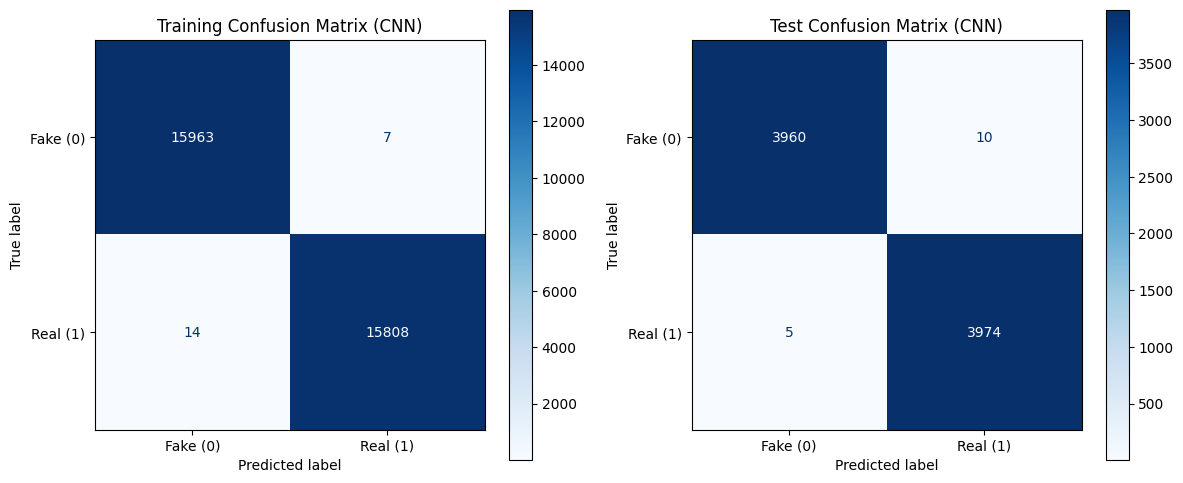

In [ ]:
# Confusion matrices
train_cm_cnn = confusion_matrix(y_train, y_train_pred_cnn, labels=[0, 1])
test_cm_cnn = confusion_matrix(y_test, y_pred_cnn, labels=[0, 1])

print("\nTraining Confusion Matrix (CNN):")
print(train_cm_cnn)
print("\nTest Confusion Matrix (CNN):")
print(test_cm_cnn)

# Visualize confusion matrices
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
ConfusionMatrixDisplay(confusion_matrix=train_cm_cnn, display_labels=['Fake (0)', 'Real (1)']).plot(ax=ax1, cmap='Blues')
ax1.set_title("Training Confusion Matrix (CNN)")
ConfusionMatrixDisplay(confusion_matrix=test_cm_cnn, display_labels=['Fake (0)', 'Real (1)']).plot(ax=ax2, cmap='Blues')
ax2.set_title("Test Confusion Matrix (CNN)")
plt.tight_layout()
plt.show()

In [ ]:
# Save the model
#model_cnn.save('NLP_Project_CNN_Model.keras')

In [ ]:
model.save('FakeDetectionCNN_Model.h5')

In [ ]:
import pickle
from tensorflow.keras.preprocessing.text import Tokenizer
from google.colab import files

# Initialize and fit tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['combined'])  # Ensure 'df' is already defined

# Save the tokenizer
with open("tokenizer.pkl", "wb") as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

print("✅ Tokenizer saved successfully!")

✅ Tokenizer saved successfully!


In [ ]:
from google.colab import files

# Save the model
model_cnn.save('NLP_Project_CNN_Model.h5')

# Download the file
files.download('NLP_Project_CNN_Model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>